In [2]:
#importing packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
results_df = pd.read_csv('lda_tuning_results.csv')

In [4]:
results_df.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.296637
1,75% Corpus,2,0.01,0.31,0.269019
2,75% Corpus,2,0.01,0.61,0.238975
3,75% Corpus,2,0.01,0.9099999999999999,0.253011
4,75% Corpus,2,0.01,symmetric,0.253011


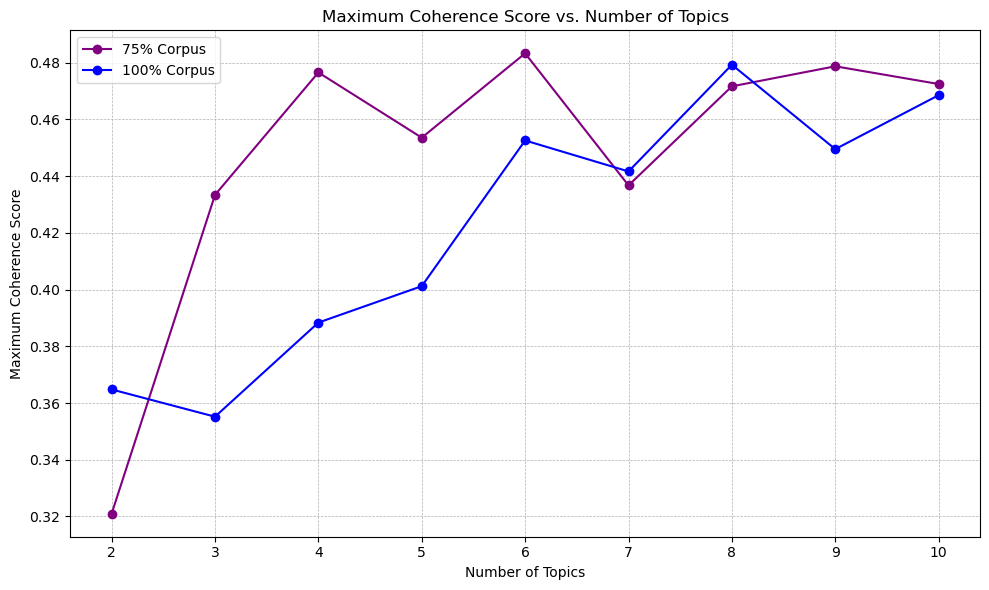

In [25]:
# Group by 'Topics' and 'Validation_Set' and then find the maximum coherence score for each group
grouped_data = results_df.groupby(['Topics', 'Validation_Set'])['Coherence'].max().reset_index()

# Split data into the two validation sets
validation_set_1 = grouped_data[grouped_data['Validation_Set'] == '75% Corpus']
validation_set_2 = grouped_data[grouped_data['Validation_Set'] == '100% Corpus']

plt.figure(figsize=(10,6))
plt.plot(validation_set_1['Topics'], validation_set_1['Coherence'], label='75% Corpus', marker='o', color='purple')
plt.plot(validation_set_2['Topics'], validation_set_2['Coherence'], label='100% Corpus', marker='o', color='blue')
plt.title('Maximum Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Maximum Coherence Score')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Finding the row where Coherence is maximum for the 100% Corpus
results_100_corpus = results_df[results_df['Validation_Set'] == '100% Corpus']

optimal_parameters = results_100_corpus[results_100_corpus['Coherence'] == results_100_corpus['Coherence'].max()]

optimal_parameters[['Validation_Set', 'Alpha', 'Beta', 'Topics', 'Coherence']]


,Validation_Set,Alpha,Beta,Topics,Coherence
473,100% Corpus,symmetric,0.9099999999999999,8,0.479271
